In [33]:
import string
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import numpy as np
import unidecode
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

import os
from os import path

data = pd.read_csv('./data/events.csv.gz',compression='gzip',low_memory=False)


In [34]:
stopw = ''
stopw = stopw.split(',')

In [35]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [36]:
data['search_term'].value_counts()[0:10]
### Se puede ver que hay keywords repetidas dependiendo
### de la forma en que se ingrasaron

Iphone       1207
Iphone 6     1057
iPhone 6     1005
iphone 6      932
iphone        882
iphone 6s     784
Iphone 6s     736
iPhone 6s     716
Motorola      679
iPhone        638
Name: search_term, dtype: int64

In [37]:
search_term = data['search_term']

In [38]:
search_term.dropna(inplace=True)

In [39]:
search_term = search_term.apply(lambda s: re.sub(r'[^\w]', ' ', s)) ##### saco todo lo que no sea alfanumerico
search_term = search_term.apply(lambda s: unidecode.unidecode(s)) ####### saco los acentos
search_term = search_term.apply(lambda s: re.sub(r'\b\w{1,3}\b', '', s)) ###### remuevo las palabras cortas
search_term = search_term.apply(lambda s: re.sub(' +',' ',s)) ###### remuevo los espacios en blanco de mas
search_term = search_term.apply(lambda s: s.strip()) ###### remuevo los espacios en blanco de mas
search_term = search_term.apply(lambda s: re.sub("^\d+\s|\s\d+\s|\s\d+$", "", s))
search_term = search_term.apply(lambda s: s.upper()) ###### lo paso a mayuscula
#### al parecer samsung es buscada pero mal escrita
search_term = search_term.apply(lambda s: s.replace("SANSUNG", "SAMSUNG")) 
search_term = search_term.apply(lambda s: s.replace("SMSUNG", "SAMSUNG")) 

In [40]:
search_term.replace('', np.nan, inplace=True)
search_term.dropna(inplace=True)

In [41]:
frecuency = search_term.apply(lambda s: pd.value_counts(s.split(" "))).sum(axis = 0)

In [42]:
frecuency = frecuency.apply(lambda x: int(x))

In [43]:
frecuency = frecuency.sort_values(ascending=False)[0:500]

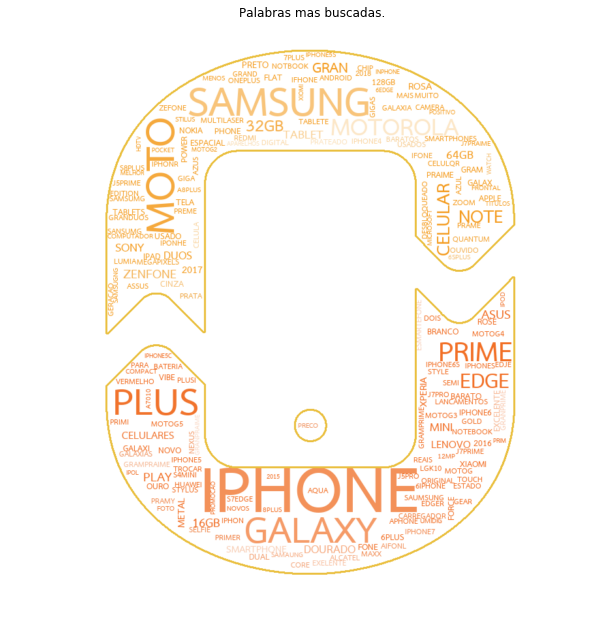

In [44]:
mascara = np.array(Image.open(d + '/trocafone.png'))
wordcloud = WordCloud(
    background_color="white",
    font_path = '/usr/share/fonts/truetype/tlwg/Laksaman-Bold.ttf', #### Si no quieren usar esta font, siplemente se comenta el renglon
    mask=mascara,
    contour_width=2,
    contour_color='#EABF3E',
    stopwords=stopw,
    min_font_size=1,
    max_font_size=300, 
    random_state=267,
    width=1024, 
    height=768
).generate_from_frequencies(frecuency)

image_colors = ImageColorGenerator(mascara)
fig = plt.figure(1)

plt.title('Palabras mas buscadas.')
plt.imshow(wordcloud.recolor(color_func=image_colors),cmap=plt.cm.gray,interpolation="bilinear")
fig.set_size_inches(10,12)
plt.axis('off')
plt.savefig("PalabrasMasBuscadas.png", dpi=600)
plt.show()